In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [134]:
data=pd.read_excel('SulpakDatasets.xlsx')
data

,Name,opSystem,countSIMcard,display,ram,camera,fronfCamera,NFC,product_availability,newPrice
0,Смартфон Samsung Galaxy A73 8/256GB Green,Android,2,"6,7″ - 17,02 см",256,108 Mpx + 12 Mpx + 5 Mpx + 5 Mpx,32 Mpx,Да,На витрине,279 890
1,Смартфон Apple iPhone 14 Pro Max 6/256GB Gold,iOS 16,1,"6,7″ - 17,02 см",256,48 Mpx + 12 Mpx + 12 Mpx,12 Mpx,Да,Есть в наличии,839 990
2,Смартфон Apple iPhone 14 Pro Max 6/128GB Silver,iOS 16,1,"6,7″ - 17,02 см",128,48 Mpx + 12 Mpx + 12 Mpx,12 Mpx,Да,Есть в наличии,769 990
3,Смартфон Apple iPhone 14 Pro Max 6/256GB Space...,iOS 16,1,"6,7″ - 17,02 см",256,48 Mpx + 12 Mpx + 12 Mpx,12 Mpx,Да,Есть в наличии,839 990
4,Смартфон Apple iPhone 11 64GB Black Slim Box,iOS 13,1,"6,1″ - 15,49 см",64,12 Mpx + 12 Mpx,12 Mpx,Да,Есть в наличии,279 990
...,...,...,...,...,...,...,...,...,...,...
676,Смартфон Motorola G52 6/128GB Glacier Blue,Android 12,2,"6,6″ - 16,76 см",128,50 Mpx + 8 Mpx + 2 Mpx,16 Mpx,Да,Есть в наличии,\n\n139 990
677,Смартфон Motorola Edge E30 Fusion 12/256GB Cos...,Android 12,2,"6,55″ - 16,64 см",256,50 Mpx + 13 Mpx,32 Mpx,Да,Есть в наличии,\n\n349 990
678,Смартфон Motorola G42 4/128GB Atlantic Green,Android 12,2,"6,5″ - 16,51 см",128,50 Mpx + 8 Mpx + 2 Mpx,16 Mpx,Да,Есть в наличии,\n\n119 990
679,Смартфон Motorola Edge E30 Ultra 12/256GB Star...,Android 12,2,"6,67″ - 16,94 см",256,200 Mpx + 50 Mpx + 12 Mpx,60 Mpx,Да,Есть в наличии,\n\n499 990


In [135]:
data["newPrice"]=data["newPrice"].apply(lambda x: x.replace(' ', '').replace('от', '')).astype('int')

In [136]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [137]:
data.Name=le.fit_transform(data.Name)
data.opSystem=le.fit_transform(data.opSystem)
data.display=le.fit_transform(data.display)
data.camera=le.fit_transform(data.camera)
data.fronfCamera=le.fit_transform(data.fronfCamera)
data.NFC=le.fit_transform(data.NFC)
data.product_availability=le.fit_transform(data.product_availability)


In [138]:
dataset=data.values
X=dataset[:,0:9]   #[0;9)
Y=dataset[:,9]  #9

In [139]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
X_scale=min_max_scaler.fit_transform(X)
X_scale

array([[0.59850746, 0.        , 1.        , ..., 0.4375    , 0.        ,
        0.33333333],
       [0.25074627, 0.96875   , 0.        , ..., 0.125     , 0.        ,
        0.        ],
       [0.24179104, 0.96875   , 0.        , ..., 0.125     , 0.        ,
        0.        ],
       ...,
       [0.37910448, 0.09375   , 1.        , ..., 0.3125    , 0.        ,
        0.        ],
       [0.37462687, 0.09375   , 1.        , ..., 0.8125    , 0.        ,
        0.        ],
       [0.37164179, 0.09375   , 1.        , ..., 0.4375    , 0.        ,
        0.        ]])

In [140]:
Y = Y.reshape(-1, 1)

In [141]:
Y_scale=min_max_scaler.fit_transform(Y)

In [142]:
def compute_cost(AL, Y):
    m = Y.shape[1]

    cost = (1./(2.*m)) * np.sum(np.square(AL - Y))
    
    return cost

In [143]:
def relu(Z):
    A = np.maximum(0,Z)
    cache = Z
    return A, cache

In [144]:
def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    return dZ

In [145]:
m=9

In [146]:
import numpy as np

def L_layer_model(X, Y, layers_dims, learning_rate, num_iterations, print_cost=False):
    np.random.seed(1)
    costs = []
    parameters = {}
    L = len(layers_dims) - 1  

    for l in range(1, L+1):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * learning_rate #(1, 32)
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))  #0


    for i in range(num_iterations):

        # Forward 
        AL = X
        caches = []
        for l in range(1, L):
            AL_prev = AL
            Wl = parameters['W' + str(l)]
            bl = parameters['b' + str(l)]
            Zl = np.dot(Wl, AL_prev) + bl
            AL, cache = relu(Zl)
            caches.append(cache)


        # Output layer (linear activation)
        WL = parameters['W' + str(L)]
        bL = parameters['b' + str(L)]
        ZL = np.dot(WL, AL) + bL

        cost = compute_cost(ZL, Y)

        # Backward 
        dZL = (1./m) * (ZL - Y)
        grads = {}
        grads['dW' + str(L)] = np.dot(dZL, AL.T)
        grads['db' + str(L)] = np.sum(dZL, axis=1, keepdims=True)

        for l in reversed(range(1, L)):
            cache = caches[l-1]
            dA = np.dot(parameters['W' + str(l+1)].T, dZL)
            dZ = relu_backward(dA, cache)
            grads['dW' + str(l)] = np.dot(dZ, AL_prev.T)
            grads['db' + str(l)] = np.sum(dZ, axis=1, keepdims=True)

        # Update parameters
        for l in range(1, L+1):
            parameters['W' + str(l)] = parameters['W' + str(l)] - learning_rate * grads['dW' + str(l)]
            parameters['b' + str(l)] = parameters['b' + str(l)] - learning_rate * grads['db' + str(l)]
            
            
    
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" % (i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
    plt.plot(costs, label='Test')     
    return ZL #чтобы вывести пред   

In [147]:
x_train, x_test, y_train, y_test = train_test_split(X_scale, Y_scale, test_size=0.2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(544, 9) (137, 9) (544, 1) (137, 1)


In [148]:
m=9
layers_dims=[9, 32, 1]
learning_rate=0.01
num_iterations=10

In [149]:
x_train = np.transpose(x_train)
y_train = np.transpose(y_train)
x_test = np.transpose(x_test)
y_test = np.transpose(y_test)

Cost after iteration 0: 0.068669
Cost after iteration 100: 0.007625
Cost after iteration 200: 0.005354
Cost after iteration 300: 0.004818
Cost after iteration 400: 0.004625
Cost after iteration 500: 0.004472
Cost after iteration 600: 0.004327
Cost after iteration 700: 0.004166
Cost after iteration 800: 0.004020
Cost after iteration 900: 0.003886
Cost after iteration 1000: 0.003668
Cost after iteration 1100: 0.003514
Cost after iteration 1200: 0.003389
Cost after iteration 1300: 0.003288
Cost after iteration 1400: 0.003214
Cost after iteration 1500: 0.003385
Cost after iteration 1600: 0.003294
Cost after iteration 1700: 0.003313
Cost after iteration 1800: 0.003237
Cost after iteration 1900: 0.003175


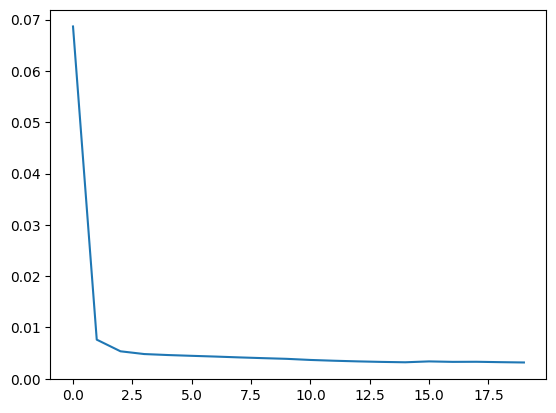

In [150]:
parameters = L_layer_model(x_train, y_train, layers_dims, learning_rate=0.01, num_iterations = 2000, print_cost=True)

In [151]:
print(parameters)

[[ 2.13524679e-01 -2.70858270e-02  4.68972312e-01  4.11009623e-01
   6.25168586e-01  2.30177727e-01  5.93842000e-01  2.97776766e-01
   5.21691444e-01  3.66989027e-01  5.94728656e-01  4.63087463e-01
   1.16602961e-01  1.48864589e-01 -6.59556365e-03 -2.23378117e-02
   2.51710489e-01  2.41629432e-02  2.92585293e-02  2.70318786e-01
   2.57915388e-01  1.66902853e-01  2.23611503e-01  2.07477264e-01
   6.54325356e-02  6.97397049e-02  2.95373841e-01  2.69143409e-02
   2.13546749e-01  1.26346986e-01  6.62714935e-02  1.23579043e-01
   6.95249270e-01  2.53521299e-01  2.51707396e-01  5.43323851e-01
   1.39469632e-01  1.04599403e-01  1.16589236e-01  2.16965752e-01
   3.96341843e-01  1.66950205e-01  1.53365287e-01  6.35438766e-02
   4.26808921e-01  1.19973731e-01  6.54962332e-02  6.30912888e-02
   5.42378069e-01  3.97220356e-01  1.30549572e-01  1.36613114e-01
   2.21271515e-01  8.22711387e-03  8.08852833e-02  2.13568819e-01
   2.46952453e-01  4.34958684e-02  7.21573931e-01  4.26947084e-01
   9.19345

In [152]:
y_pred = parameters.reshape(-1, 1)
y_pred

array([[ 2.13524679e-01],
       [-2.70858270e-02],
       [ 4.68972312e-01],
       [ 4.11009623e-01],
       [ 6.25168586e-01],
       [ 2.30177727e-01],
       [ 5.93842000e-01],
       [ 2.97776766e-01],
       [ 5.21691444e-01],
       [ 3.66989027e-01],
       [ 5.94728656e-01],
       [ 4.63087463e-01],
       [ 1.16602961e-01],
       [ 1.48864589e-01],
       [-6.59556365e-03],
       [-2.23378117e-02],
       [ 2.51710489e-01],
       [ 2.41629432e-02],
       [ 2.92585293e-02],
       [ 2.70318786e-01],
       [ 2.57915388e-01],
       [ 1.66902853e-01],
       [ 2.23611503e-01],
       [ 2.07477264e-01],
       [ 6.54325356e-02],
       [ 6.97397049e-02],
       [ 2.95373841e-01],
       [ 2.69143409e-02],
       [ 2.13546749e-01],
       [ 1.26346986e-01],
       [ 6.62714935e-02],
       [ 1.23579043e-01],
       [ 6.95249270e-01],
       [ 2.53521299e-01],
       [ 2.51707396e-01],
       [ 5.43323851e-01],
       [ 1.39469632e-01],
       [ 1.04599403e-01],
       [ 1.1

In [153]:
len(y_pred)

544

In [154]:
y_train = y_train.reshape(-1, 1)
y_train

array([[0.28015539],
       [0.02760391],
       [0.5080166 ],
       [0.45335177],
       [0.89057925],
       [0.26202489],
       [0.58090303],
       [0.2711357 ],
       [0.45790991],
       [0.43503906],
       [0.68112187],
       [0.61734624],
       [0.12527173],
       [0.15269525],
       [0.025144  ],
       [0.02760391],
       [0.11625203],
       [0.05703181],
       [0.02394957],
       [0.48059308],
       [0.19961862],
       [0.48059308],
       [0.18904736],
       [0.48068418],
       [0.12536284],
       [0.11734533],
       [0.46237147],
       [0.0614961 ],
       [0.25282298],
       [0.15260414],
       [0.09784821],
       [0.05248096],
       [0.80867312],
       [0.32580052],
       [0.20736007],
       [0.38948504],
       [0.16180605],
       [0.24380329],
       [0.18002766],
       [0.18913846],
       [0.66280915],
       [0.45326067],
       [0.17993655],
       [0.06158721],
       [0.34949134],
       [0.10714123],
       [0.09347502],
       [0.096

In [155]:
from sklearn.metrics import mean_squared_error, r2_score

In [156]:
print('Mean squared error (MSE): %.5f'
      % mean_squared_error(y_train, y_pred))
print('Coefficient of determination (R^2): %.5f'
      % r2_score(y_train, y_pred))

Mean squared error (MSE): 0.00631
Coefficient of determination (R^2): 0.89108


In [157]:
test=y_train[1:20]
test

array([[0.02760391],
       [0.5080166 ],
       [0.45335177],
       [0.89057925],
       [0.26202489],
       [0.58090303],
       [0.2711357 ],
       [0.45790991],
       [0.43503906],
       [0.68112187],
       [0.61734624],
       [0.12527173],
       [0.15269525],
       [0.025144  ],
       [0.02760391],
       [0.11625203],
       [0.05703181],
       [0.02394957],
       [0.48059308]])

In [158]:
pred=y_pred[1:20]
pred

array([[-0.02708583],
       [ 0.46897231],
       [ 0.41100962],
       [ 0.62516859],
       [ 0.23017773],
       [ 0.593842  ],
       [ 0.29777677],
       [ 0.52169144],
       [ 0.36698903],
       [ 0.59472866],
       [ 0.46308746],
       [ 0.11660296],
       [ 0.14886459],
       [-0.00659556],
       [-0.02233781],
       [ 0.25171049],
       [ 0.02416294],
       [ 0.02925853],
       [ 0.27031879]])

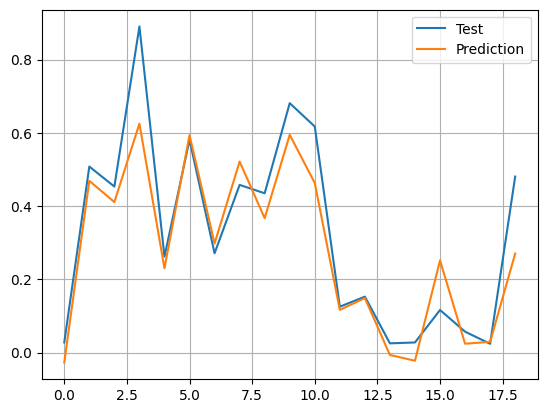

In [159]:
plt.plot(test, label='Test')
plt.plot(pred, label='Prediction')
plt.legend()
plt.grid(True)
plt.show()

In [160]:
test = test.flatten()
pred = pred.flatten()

In [161]:
df = pd.DataFrame({'Test': test, 'Prediction': pred})
pd.options.display.float_format = '{:.2f}'.format
print(df)

    Test  Prediction
0   0.03       -0.03
1   0.51        0.47
2   0.45        0.41
3   0.89        0.63
4   0.26        0.23
5   0.58        0.59
6   0.27        0.30
7   0.46        0.52
8   0.44        0.37
9   0.68        0.59
10  0.62        0.46
11  0.13        0.12
12  0.15        0.15
13  0.03       -0.01
14  0.03       -0.02
15  0.12        0.25
16  0.06        0.02
17  0.02        0.03
18  0.48        0.27


Cost after iteration 0: 0.059739
Cost after iteration 100: 0.024656
Cost after iteration 200: 0.018906
Cost after iteration 300: 0.008965
Cost after iteration 400: 0.006129
Cost after iteration 500: 0.005161
Cost after iteration 600: 0.004675
Cost after iteration 700: 0.004387
Cost after iteration 800: 0.004208
Cost after iteration 900: 0.004090
Cost after iteration 1000: 0.004009
Cost after iteration 1100: 0.003951
Cost after iteration 1200: 0.003906
Cost after iteration 1300: 0.003870
Cost after iteration 1400: 0.003837
Cost after iteration 1500: 0.003803
Cost after iteration 1600: 0.003775
Cost after iteration 1700: 0.003750
Cost after iteration 1800: 0.003729
Cost after iteration 1900: 0.003711


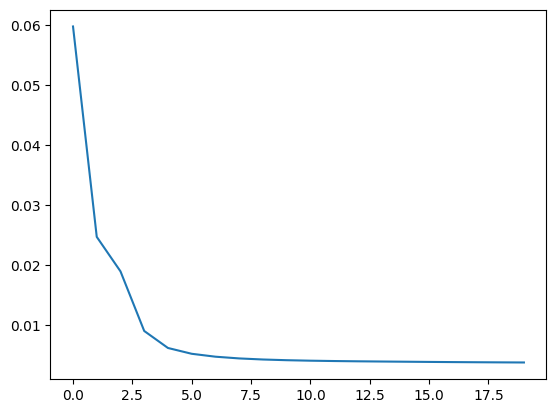

In [162]:
parameters = L_layer_model(x_test, y_test, layers_dims, learning_rate=0.01, num_iterations = 2000, print_cost=True)

In [163]:
y_pred = parameters.reshape(-1, 1)
len(y_pred)

137

In [164]:
y_test = y_test.reshape(-1, 1)

In [165]:
print('Mean squared error (MSE): %.5f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.5f'
      % r2_score(y_test, y_pred))

Mean squared error (MSE): 0.00738
Coefficient of determination (R^2): 0.85494
